# Preparing Dataset



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="MXbHHpzhHMkKkAT0uGsY")
project = rf.workspace("ulat-kantong").project("deteksi-ulat-kantong-8w83f")
version = project.version(16)
dataset = version.download("yolov8")

/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Deteksi-Ulat-Kantong-16 in yolov8:: 100%|██████████| 220/220 [00:00<00:00, 6362.54it/s]


## Custom Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={HOME}/datasets/Deteksi-Ulat-Kantong-16/data.yaml epochs=50 batch=12 imgsz=1280 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.9 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/Deteksi-Ulat-Kantong-16/data.yaml, epochs=50, patience=50, batch=12, imgsz=1280, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, v

In [ ]:
!ls {HOME}/runs/detect/train3/

args.yaml					     P_curve.png       train_batch280.jpg
confusion_matrix_normalized.png			     PR_curve.png      train_batch281.jpg
confusion_matrix.png				     R_curve.png       train_batch282.jpg
events.out.tfevents.1714969227.e22cffe6174f.42897.0  results.csv       train_batch2.jpg
F1_curve.png					     results.png       val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg  val_batch0_pred.jpg
labels.jpg					     train_batch1.jpg  weights


In [ ]:
!ls /content/runs/detect/train

args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1714949859.af28b073cbf0.3139.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch4440.jpg  weights
P_curve.png					    train_batch4441.jpg
PR_curve.png					    train_batch4442.jpg


/content


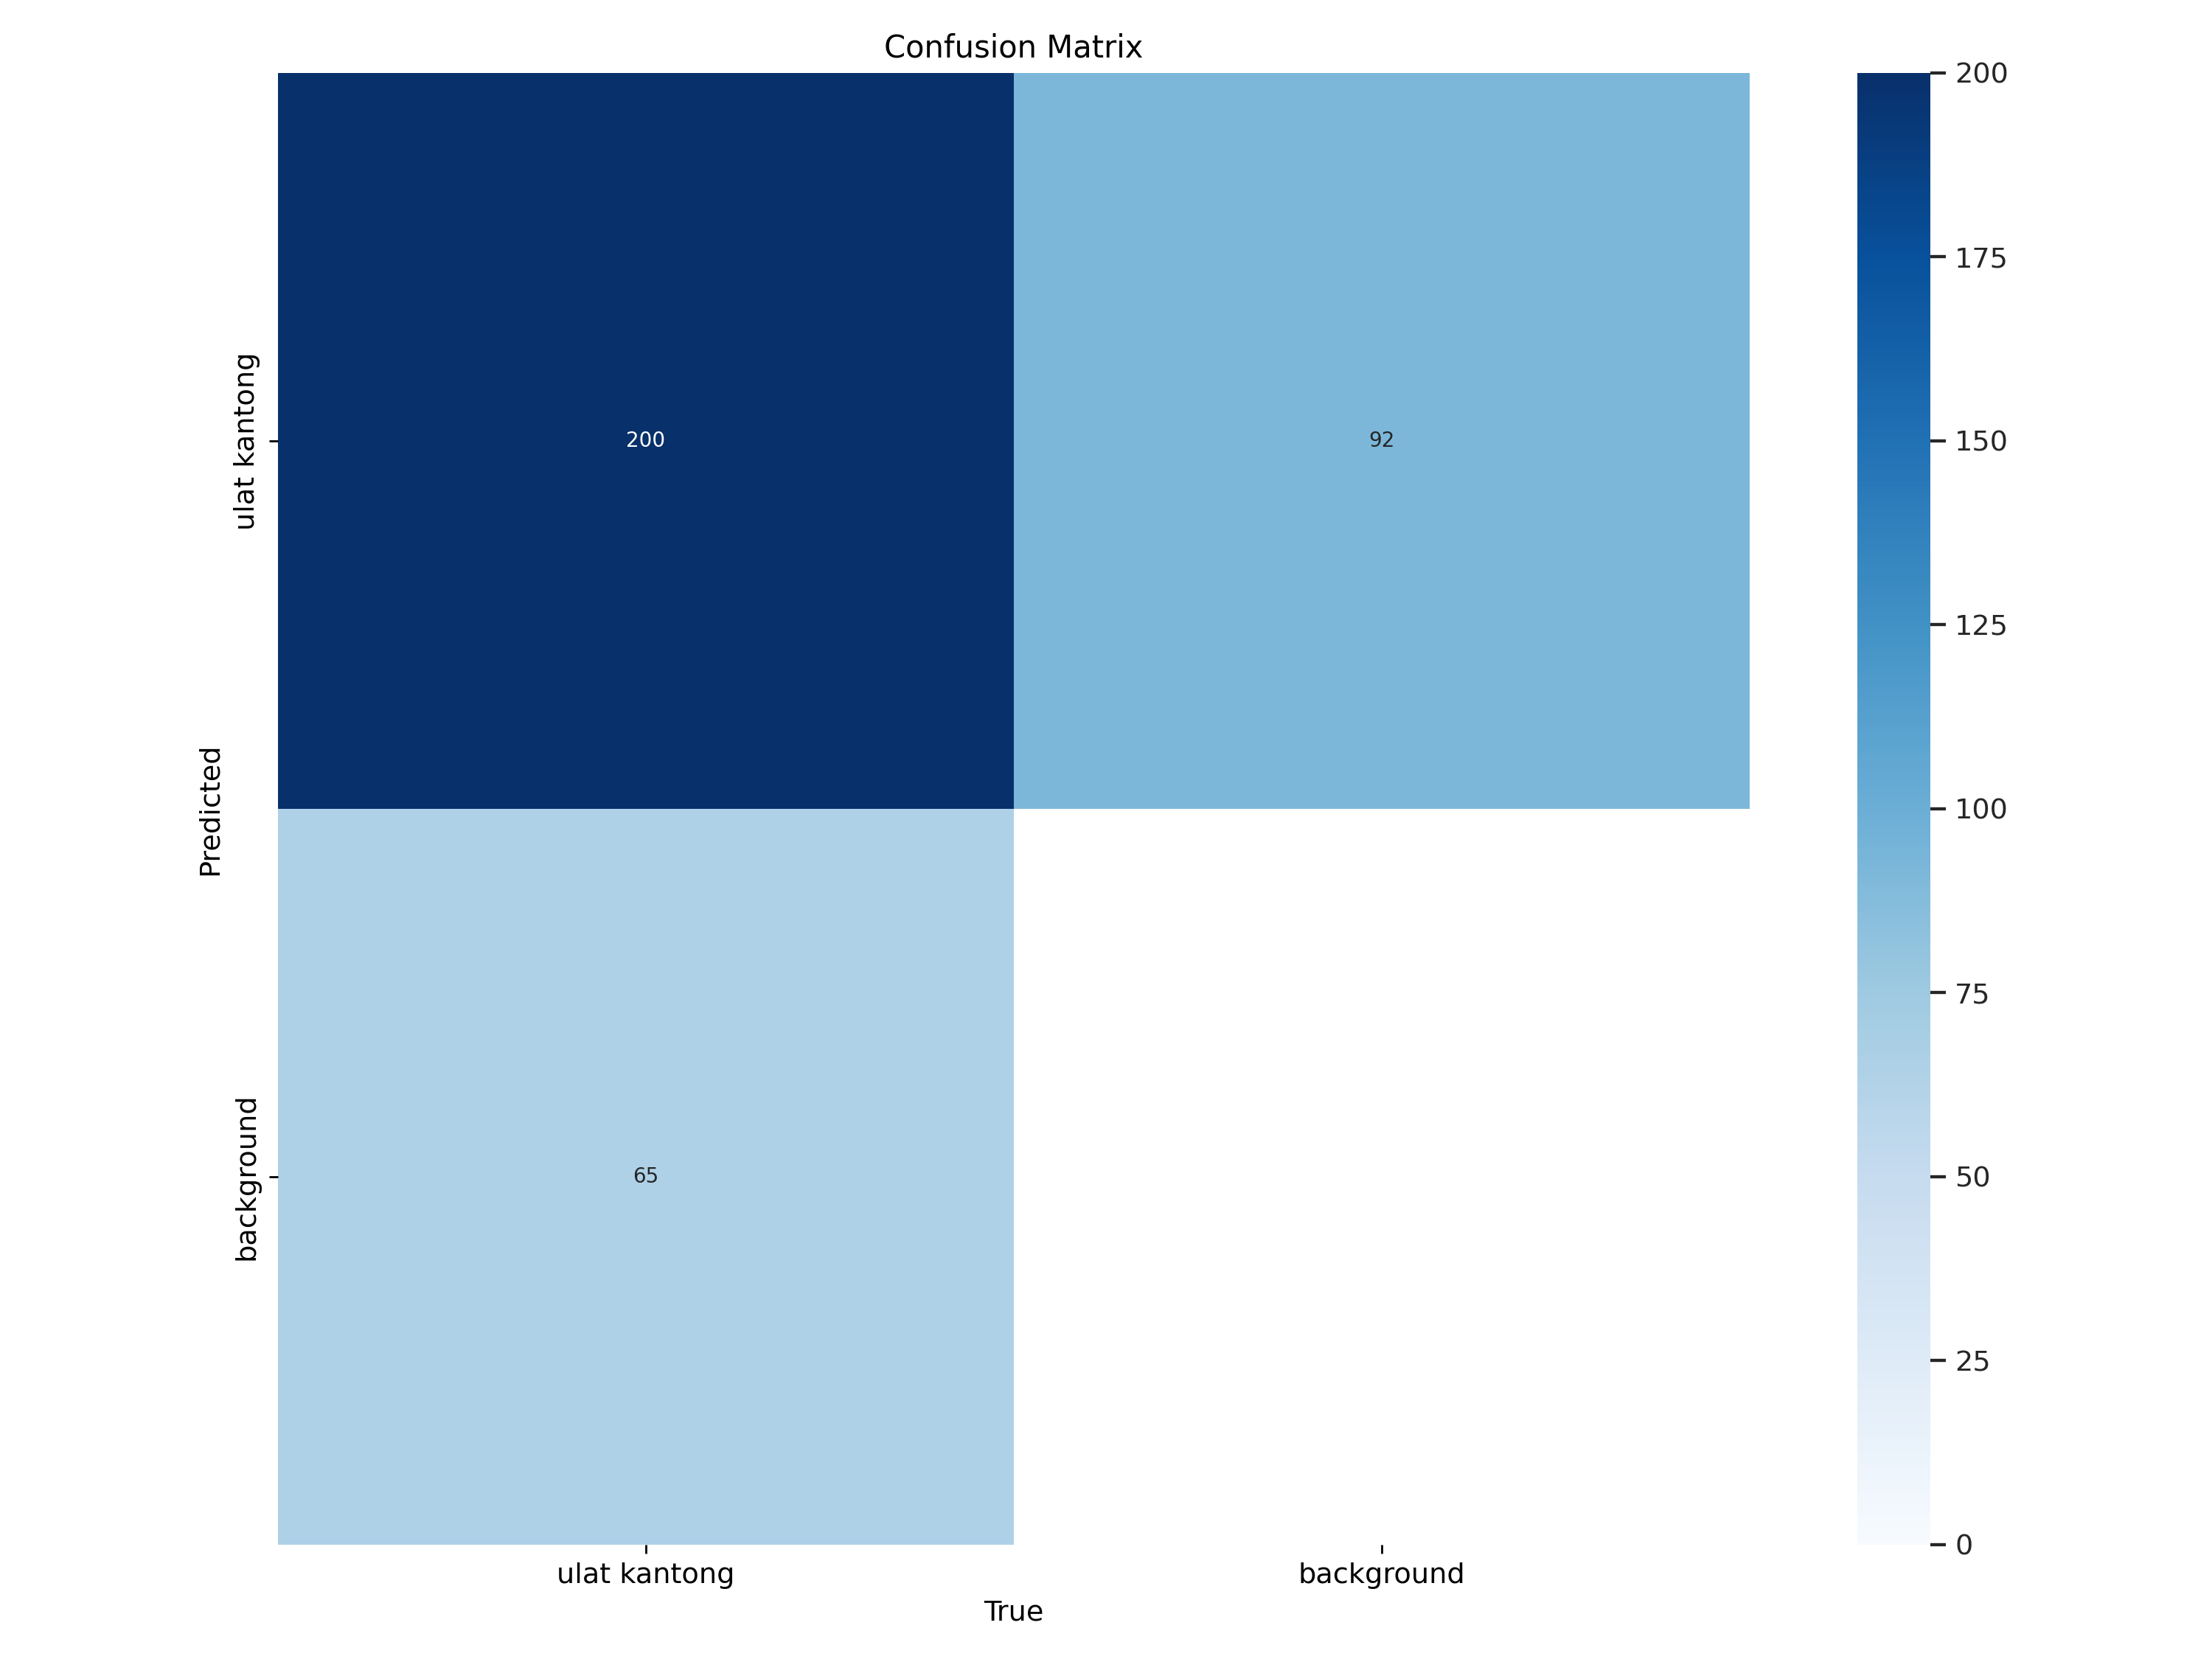

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/confusion_matrix.png', width=600)

/content


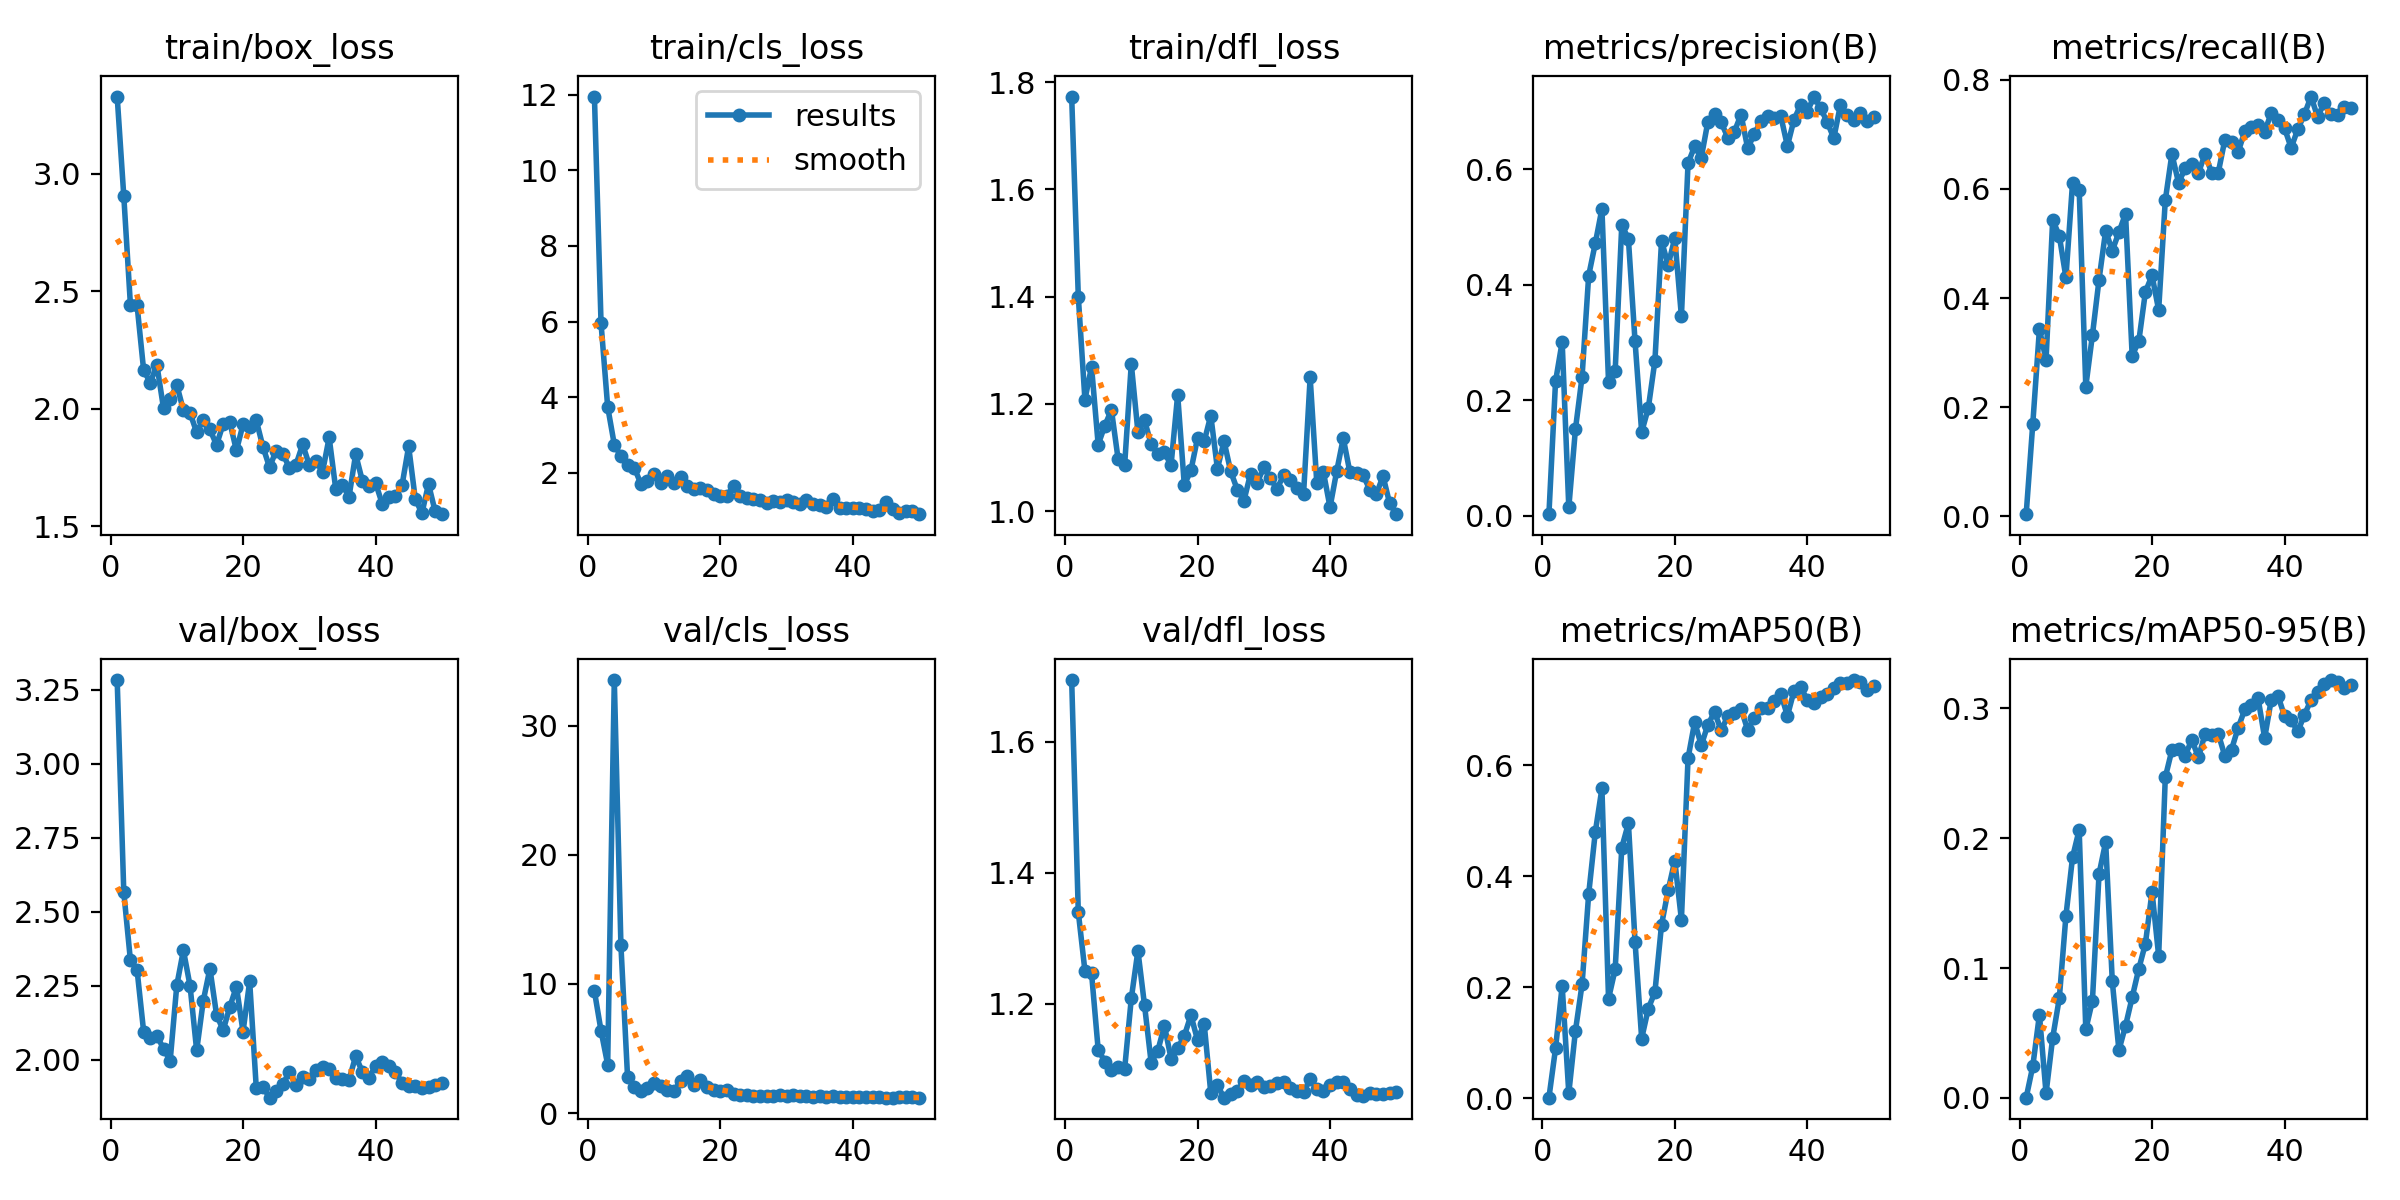

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/results.png', width=600)

/content


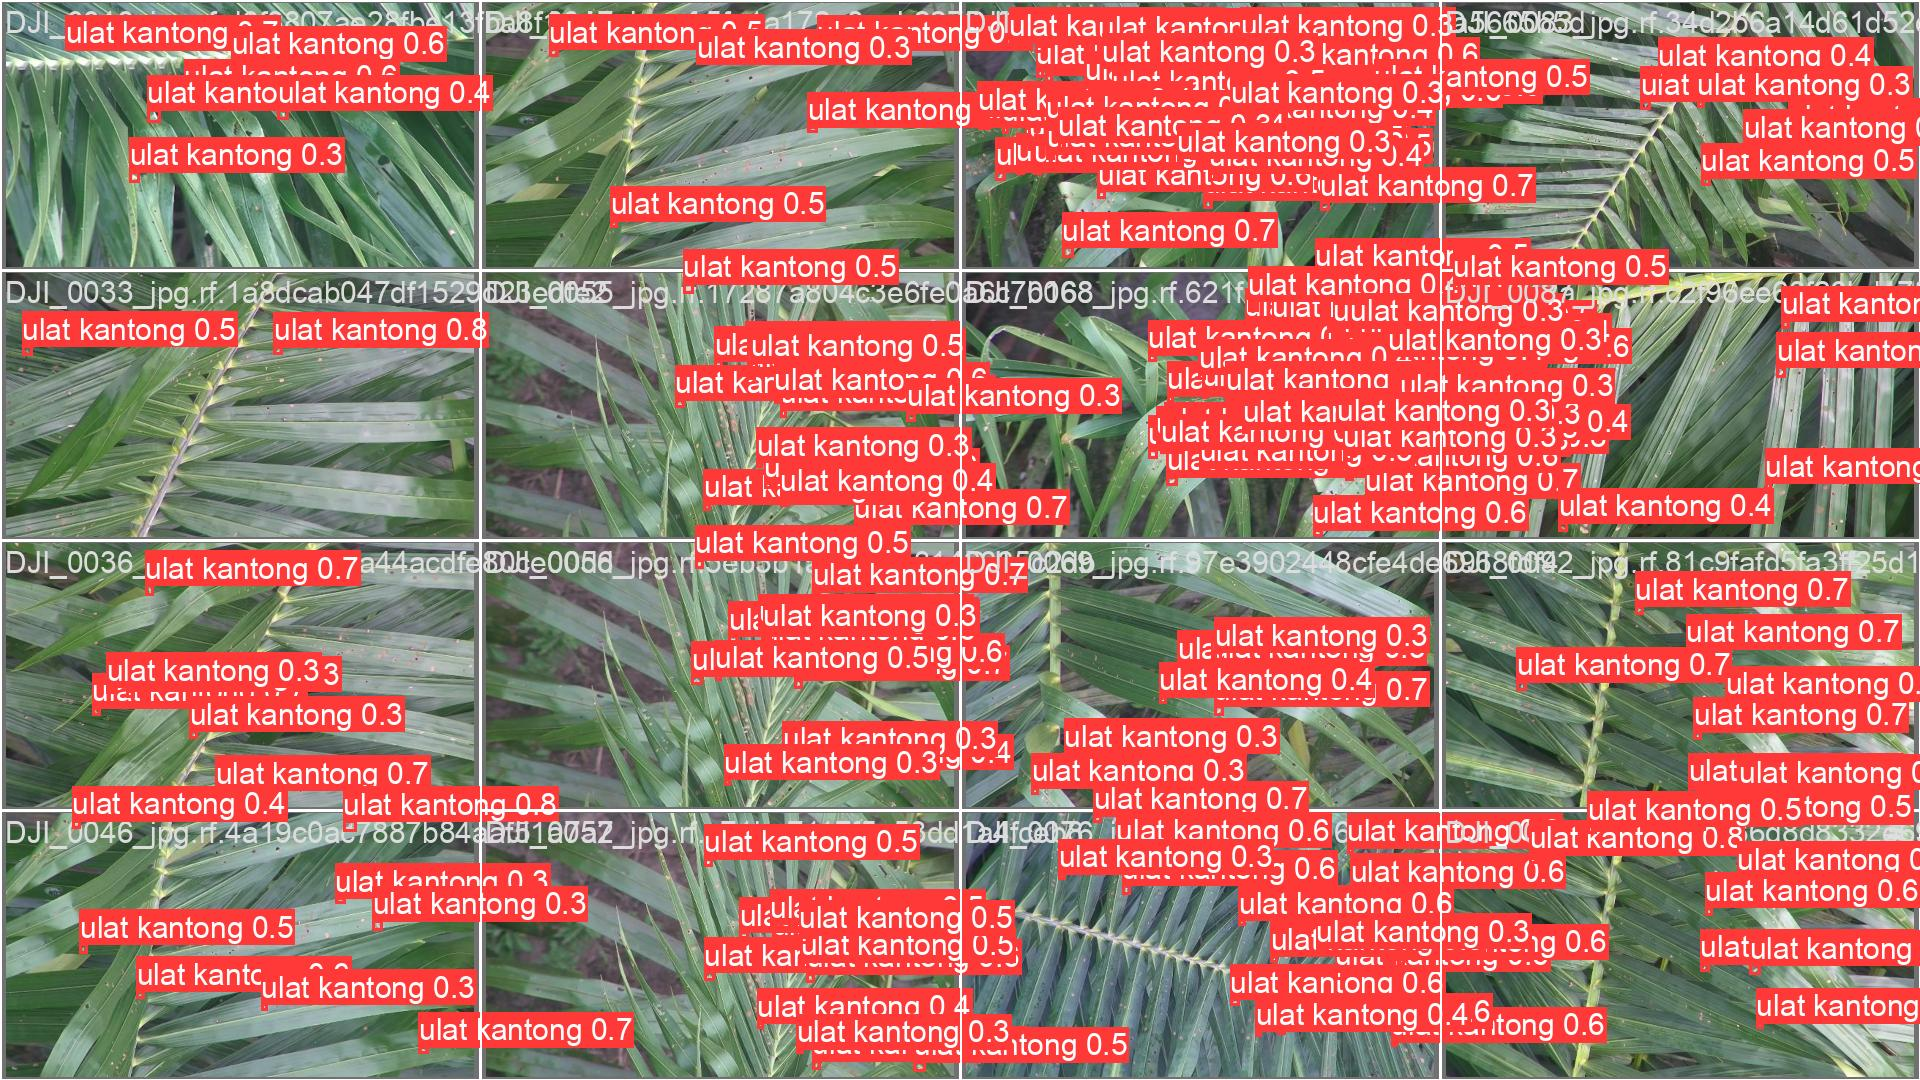

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train3/val_batch0_pred.jpg', width=1200)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train3/weights/best.pt data={HOME}/datasets/Deteksi-Ulat-Kantong-16/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/Deteksi-Ulat-Kantong-16/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:02<00:00,  1.10s/it]
                   all         21        265       0.69       0.74      0.762      0.322
Speed: 0.5ms preprocess, 41.6ms inference, 0.0ms loss, 28.4ms postprocess per image
Results saved to runs/detect/val5
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/dataset1/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/.shortcut-targets-by-id/1ZL2oxuOl2t_my-v4AMBeKWws0r_dLMXX/dataset1/valid/labels... 519 images, 262 backgrounds, 0 corrupt: 100% 519/519 [00:05<00:00, 90.37it/s] 
val: New cache created: /content/drive/.shortcut-targets-by-id/1ZL2oxuOl2t_my-v4AMBeKWws0r_dLMXX/dataset1/valid/labels.cache
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 33/33 [00:17<00:00,  1.93it/s]
                   all        519        795      0.663      0.655      0.678      0.308
Speed: 1.3ms preprocess, 20.0ms inference, 0.0ms loss, 3.3ms postpro

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source=/content/datasets/Deteksi-Ulat-Kantong-14/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/images/DJI_0005_jpg.rf.0391428f0c1e4114491d18b7c5b6fbd1.jpg: 736x1280 1 ulat kantong, 107.4ms
image 2/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/images/DJI_0005_jpg.rf.68fd8ee1d245ac3331c90fee5cb77b1a.jpg: 736x1280 (no detections), 29.5ms
image 3/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/images/DJI_0005_jpg.rf.86e5f754c8a59b5d9990f0dc917988a8.jpg: 736x1280 (no detections), 29.4ms
image 4/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/images/DJI_0005_jpg.rf.91f54c72e4d14aa257fa9f5d0e5aedb7.jpg: 736x1280 2 ulat kantongs, 29.4ms
image 5/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/images/DJI_0005_jpg.rf.93f5de96ce4d934796c154312f820ab6.jpg: 736x1280 (no detections), 29.4ms
image 6/90 /content/datasets/Deteksi-Ulat-Kantong-14/test/ima

**NOTE:** Let's take a look at few results.

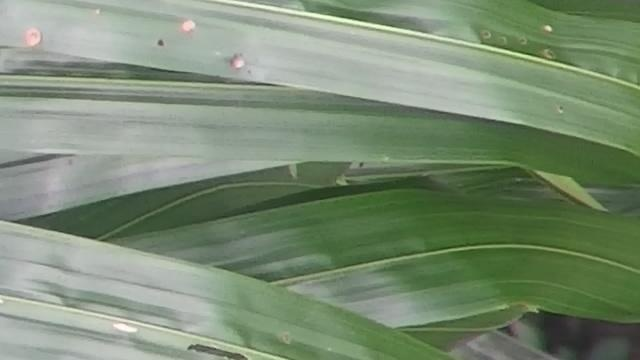

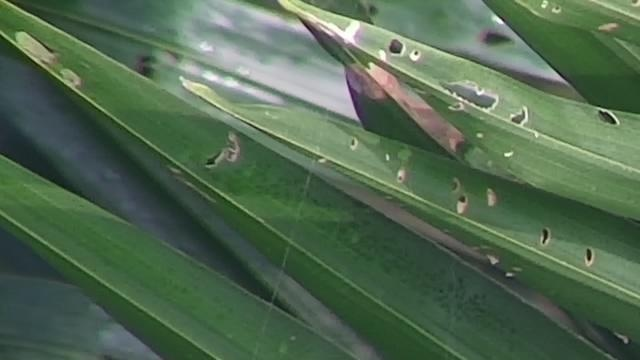

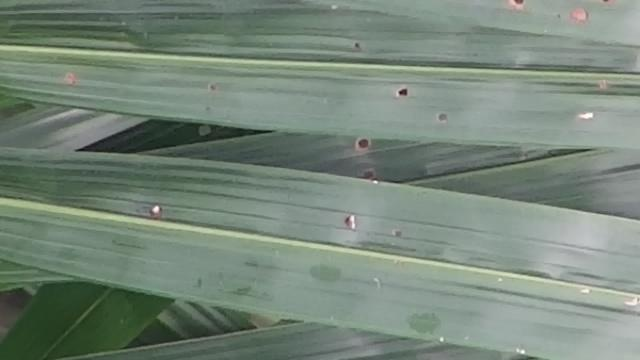

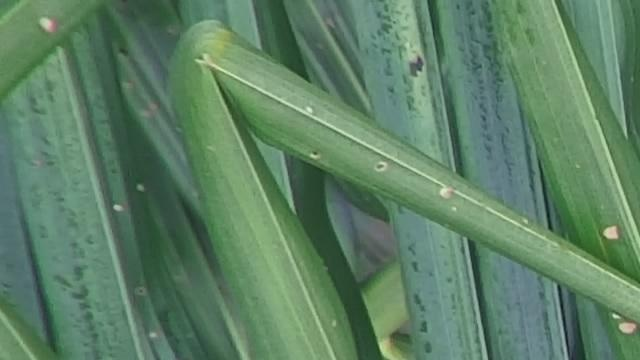

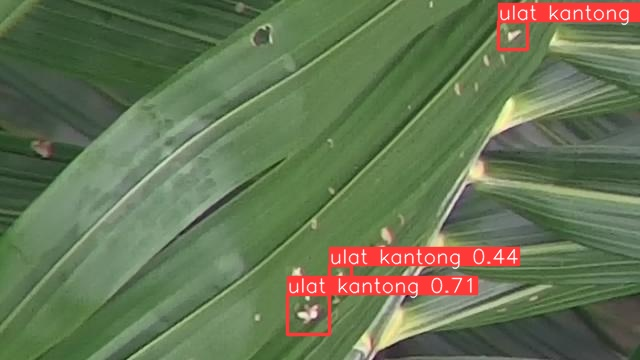

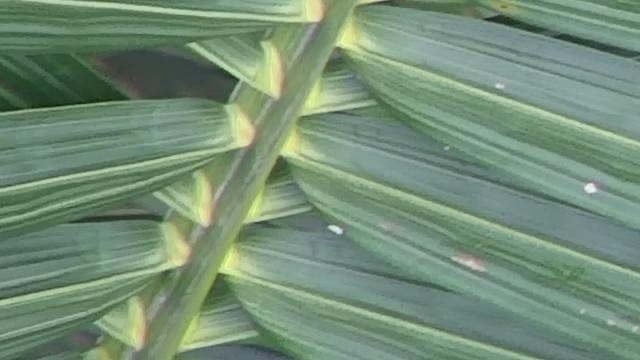

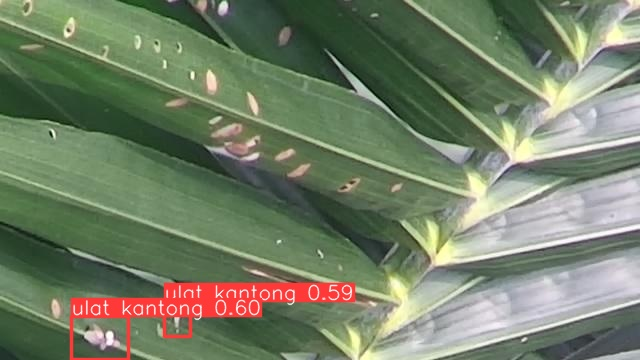

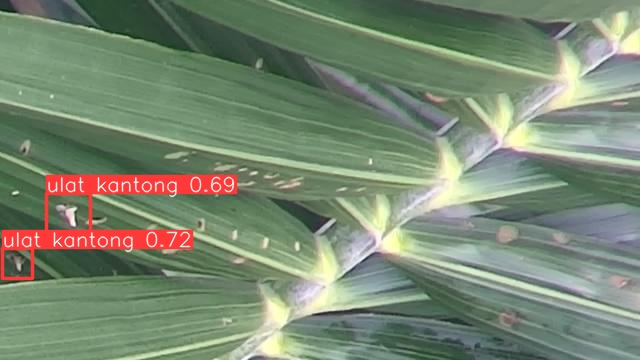

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:8]:
      display(Image(filename=image_path, width=600))
      print("\n")